In [1]:
import ROOT
import math

import numpy as np
import pickle
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes
import root_numpy
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

print "ok!"
caminho = '/home/micael/MyWorkspace/DATA/trabalho_CPE721'

massa_array = np.load(caminho+'/'+'Mass_Matrix.npy')
Mass = massa_array.T

ok!


In [2]:
gauss =np.random.normal(0.,1.,1000)


In [3]:
uniform = np.random.uniform(np.min(gauss),np.max(gauss),1000)

In [4]:
gauss.shape,uniform.shape, (gauss+uniform).shape
V = gauss+uniform

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Invariant Mass (Potential memory leak).


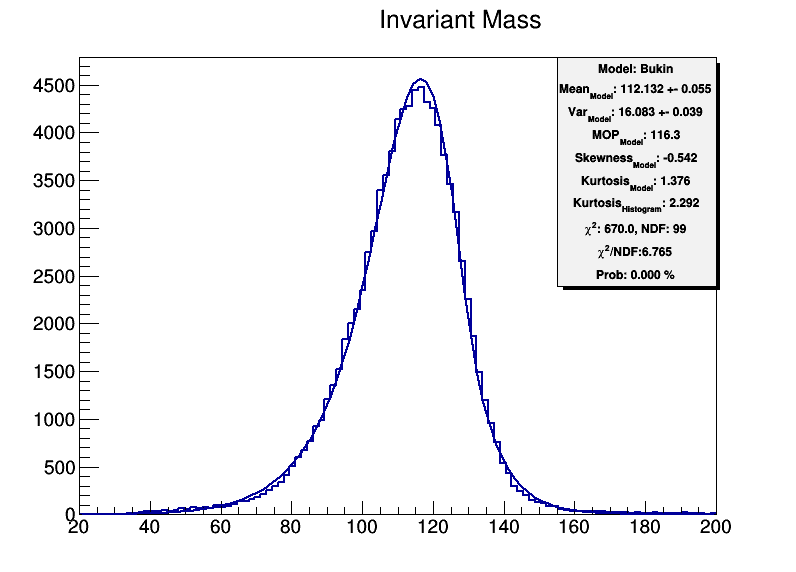

In [11]:
from ROOT import *

ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

hist = ROOT.TH1D('Invariant Mass', 'Invariant Mass', 109,20,200)
root_numpy.fill_hist(hist,Mass[1,:])
c = rootnotes.canvas("c", (800, 600))
hist.SetLineWidth(2)
#hist.SetLineColor(kBlue)
hist.Draw()

fit = FitFunctions.fitBukin(hist,85,250,fit_type='')
fit.SetLineColor(hist.GetLineColor())
fit.SetLineWidth(2)
fit.Draw("SAME")
#print fit.GetChisquare()
# Fit information
fitlabel = TPaveText( 0.7, 0.5, 0.9, 0.90, 'NDC' )
fitlabel.AddText("Model: "+fit.GetName().title())
fitlabel.AddText("Mean_{Model}: "+str(round(fit.GetHistogram().GetMean(),3))+" +- "+str(round(fit.GetHistogram().GetMeanError(),3)))
fitlabel.AddText("Var_{Model}: "+str(round(fit.GetHistogram().GetRMS(),3))+" +- "+str(round(fit.GetHistogram().GetRMSError(),3)))
fitlabel.AddText("MOP_{Model}: "+str(fit.GetHistogram().GetBinCenter(fit.GetHistogram().GetMaximumBin())))
fitlabel.AddText("Skewness_{Model}: "+str(round(fit.GetHistogram().GetSkewness(),3)))
fitlabel.AddText("Kurtosis_{Model}: "+str(round(fit.GetHistogram().GetKurtosis(),3)))
fitlabel.AddText("Kurtosis_{Histogram}: "+str(round(hist.GetKurtosis(),3)))
fitlabel.AddText("#chi^{2}: "+str(round(fit.GetChisquare()))+", NDF: "+str(fit.GetNDF()))
fitlabel.AddText('#chi^{2}/NDF:'+str(round(fit.GetChisquare()/float(fit.GetNDF()),3)))
fitlabel.AddText("Prob: %1.3f %%"%(100*fit.GetProb()))
fitlabel.Draw()
#    c.Print(save_figures+'/'+'FitBukin'+str(i)+'.png')
#    c.Print(save_figures+'/'+'FitBukin'+str(i)+'.pdf')
c


In [103]:
def my_crystalball_pdf(x, alpha, n, sigma, mean):
    if sigma < 0.:
        return 0.
    z = (x-mean)/sigma
    abs_alpha = float(abs(alpha))
    C = n/abs_alpha * 1/(n-1) * math.exp(-(pow(abs_alpha,2))/2)
    D = math.sqrt(math.pi/2)*(1+ROOT.Math.erf(abs_alpha/math.sqrt(2)))
    N = 1/(sigma*(C+D))
    if z > -alpha:
        return N*math.exp(-0.5*pow(z,2)) 
    else:
        A = math.pow(n/abs_alpha,n)*math.exp(-0.5*math.pow(abs_alpha,2))
        B = n/abs_alpha - abs_alpha
        return N*A*math.pow((B-z),-n)




In [171]:
vet = np.linspace(-5,4,num=100)
vet

array([-5.        , -4.90909091, -4.81818182, -4.72727273, -4.63636364,
       -4.54545455, -4.45454545, -4.36363636, -4.27272727, -4.18181818,
       -4.09090909, -4.        , -3.90909091, -3.81818182, -3.72727273,
       -3.63636364, -3.54545455, -3.45454545, -3.36363636, -3.27272727,
       -3.18181818, -3.09090909, -3.        , -2.90909091, -2.81818182,
       -2.72727273, -2.63636364, -2.54545455, -2.45454545, -2.36363636,
       -2.27272727, -2.18181818, -2.09090909, -2.        , -1.90909091,
       -1.81818182, -1.72727273, -1.63636364, -1.54545455, -1.45454545,
       -1.36363636, -1.27272727, -1.18181818, -1.09090909, -1.        ,
       -0.90909091, -0.81818182, -0.72727273, -0.63636364, -0.54545455,
       -0.45454545, -0.36363636, -0.27272727, -0.18181818, -0.09090909,
        0.        ,  0.09090909,  0.18181818,  0.27272727,  0.36363636,
        0.45454545,  0.54545455,  0.63636364,  0.72727273,  0.81818182,
        0.90909091,  1.        ,  1.09090909,  1.18181818,  1.27

In [176]:
array = np.zeros(vet.shape)
array2 = np.zeros(vet.shape)
for i in range(vet.shape[0]):
    array[i]=my_crystalball_pdf(vet[i],1,2,1,0)
    array2[i]=ROOT.Math.gaussian_pdf(vet[i],1,0)
    #print _crystalballPositiveAlpha(vet[i],10,2,0,1)

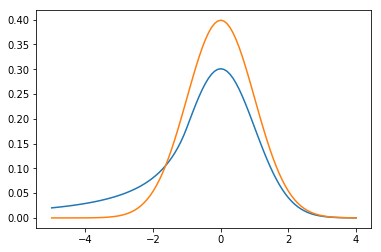

In [177]:
import matplotlib.pyplot as plt
plt.plot(vet,array)
plt.plot(vet,array2)
plt.show()


In [178]:
crystal = np.ndarray.tolist(array)
gaus = np.ndarray.tolist(array2)
crystal,gaus

([0.02028666423671257,
  0.020915670867484012,
  0.02157439194705077,
  0.022264729003557557,
  0.02298873814129031,
  0.023748645368212837,
  0.024546863726422206,
  0.02538601247202527,
  0.026268938589512472,
  0.027198740971104945,
  0.02817879764512754,
  0.0292127965008661,
  0.03030477003262001,
  0.03145913471524384,
  0.03268073573044376,
  0.033974897891241806,
  0.03534748376604799,
  0.03680496018955432,
  0.03835447457253471,
  0.04000394269584426,
  0.04176215000714554,
  0.04363886884697282,
  0.04564499453260328,
  0.04779270384809083,
  0.050095640258004503,
  0.052569131121427706,
  0.05523044338444998,
  0.05809908574301115,
  0.06119716718498612,
  0.06454982426232284,
  0.06818573257339504,
  0.0721377219715265,
  0.07644352025529408,
  0.08114665694685028,
  0.08629756778820308,
  0.09195495256516126,
  0.09818745490568886,
  0.10507575435804989,
  0.11271519058051016,
  0.12121908013048004,
  0.1307229429217751,
  0.14138993506419195,
  0.15341789829013883,
  0.1

In [170]:
gaus[0],crystal[0]

(1.4867195147342977e-06, 1.4867195147342977e-06)

In [175]:
for i in range(len(crystal)):
    print gaus[i]/crystal[i]

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [108]:
gauss = np.random.normal(0.0,1.,100)
gauss.shape

(100,)

In [109]:
gaus_pdf = StatisticalAnalysis.EstPDF(gauss,bins=100,mode='hist')
gaus_pdf[0]

EstPDF: Histogram Mode


array([ 0.01,  0.01,  0.  ,  0.  ,  0.01,  0.  ,  0.  ,  0.01,  0.  ,
        0.  ,  0.01,  0.01,  0.01,  0.01,  0.01,  0.02,  0.01,  0.03,
        0.03,  0.02,  0.  ,  0.01,  0.  ,  0.03,  0.  ,  0.03,  0.01,
        0.  ,  0.  ,  0.01,  0.03,  0.01,  0.02,  0.01,  0.01,  0.02,
        0.  ,  0.02,  0.04,  0.03,  0.02,  0.02,  0.02,  0.01,  0.01,
        0.03,  0.01,  0.01,  0.01,  0.  ,  0.01,  0.02,  0.01,  0.02,
        0.02,  0.01,  0.01,  0.02,  0.  ,  0.01,  0.03,  0.02,  0.  ,
        0.  ,  0.03,  0.03,  0.04,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.02,  0.01,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.01,  0.  ,
        0.01,  0.  ,  0.01,  0.  ,  0.01,  0.01,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01])

In [63]:
def KullbackLeibler(p,q):
    kl_values = []
    for i in range(len(p)):
        if p[i] == 0 or q[i] == 0 :
            kl_values = np.append(kl_values,0)
        else:
            kl_value = np.abs(p[i]*np.log10(p[i]/q[i]))
            if np.isnan(kl_value):
                kl_values = np.append(kl_values,0)
            else:
                kl_values = np.append(kl_values,kl_value)
    return [np.sum(kl_values),kl_values]

In [179]:

A = KullbackLeibler(gaus,crystal)
B = KullbackLeibler(crystal,gaus)
KullbackLeibler(gaus,crystal),KullbackLeibler(crystal,gaus),A[0]+B[0]/2

([1.3743160985045886,
  array([  6.14755784e-06,   9.21992244e-06,   1.36985402e-05,
           2.01612665e-05,   2.93920455e-05,   4.24404375e-05,
           6.06924690e-05,   8.59524993e-05,   1.20534505e-04,
           1.67359354e-04,   2.30052243e-04,   3.13031431e-04,
           4.21575884e-04,   5.61855434e-04,   7.40903006e-04,
           9.66504672e-04,   1.24698041e-03,   1.59082720e-03,
           2.00619729e-03,   2.50018943e-03,   3.07793954e-03,
           3.74151206e-03,   4.48861269e-03,   5.31116868e-03,
           6.19385322e-03,   7.11266333e-03,   8.03369527e-03,
           8.91229209e-03,   9.69276231e-03,   1.03088808e-02,
           1.06853776e-02,   1.07405946e-02,   1.03904380e-02,
           9.55367618e-03,   8.15853188e-03,   6.15038849e-03,
           3.50029698e-03,   2.13825403e-04,   3.66033538e-03,
           8.02270098e-03,   1.27170102e-02,   1.75266873e-02,
           2.21744447e-02,   2.63255865e-02,   2.95953605e-02,
           3.22782771e-02,   3.49

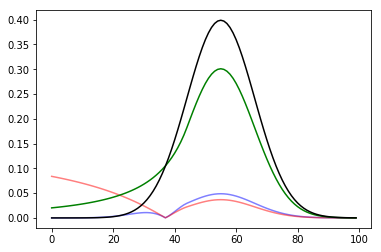

In [182]:
plt.plot(A[1],color='blue',alpha=.5)
plt.plot(B[1],color='red',alpha=.5)
plt.plot(array,color='green')
plt.plot(array2,color='black')
plt.show()

In [34]:
kl_values = []
for i in range(len(gaus_pdf[0])):
    if gaus_pdf[0][i] == 0 or crystal[i] == 0 :
        kl_values = np.append(kl_values,0)
    else:
        kl_value = np.abs(gaus_pdf[0][i]*np.log10(gaus_pdf[0][i]/crystal[i]))
        if np.isnan(kl_value):
            kl_values = np.append(kl_values,0)
        else:
            kl_values = np.append(kl_values,kl_value)
[np.sum(kl_values),kl_values]

[1.2264276754620176,
 array([ 0.00138491,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.00157654,
         0.        ,  0.00160773,  0.00162375,  0.00164007,  0.00165671,
         0.00274527,  0.00169096,  0.00281517,  0.0028512 ,  0.002888  ,
         0.        ,  0.0047239 ,  0.0030033 ,  0.00781684,  0.00639124,
         0.00819172,  0.00886034,  0.00858548,  0.00930915,  0.01004151,
         0.00720055,  0.01375898,  0.01278312,  0.00990189,  0.01357989,
         0.01236078,  0.01673933,  0.01430244,  0.0164572 ,  0.01518037,
         0.0175632 ,  0.02153497,  0.02436867,  0.02322082,  0.02799944,
         0.02228004,  0.02148657,  0.03058783,  0.02818769,  0.02934854,
         0.03719926,  0.03978556,  0.04507465,  0.03342469,  0.04085857,
         0.02781205,  0.04263031,  0.04315141,  0.04453841,  0.03269316,
         0.04213723,  0.019758